In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [1]:
import os
os.chdir("/mnt/iusers01/jw01/mdefscs4/ra_challenge/hestia/Hestia_imeche_vision_challenge/NN_recognition_train")

In [2]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as k
import glob
from PIL import Image, ImageDraw
import argparse
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from dataset.train_generator import retrieve_tf_dataset
from model.mobile_net_functional import retrieve_mobilenet_model, custom_mse

In [3]:
model = k.models.load_model("weights/step1_final.tf", custom_objects = {"custom_mse": custom_mse})

In [4]:
tf_data = retrieve_tf_dataset(to_cache = False)

In [5]:
for X,Y in tf_data.take(1):
    pass

In [ ]:
model.evaluate(tf_data, steps = 20)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [32]:
def sanitize(coords):
    A = np.clip(coords[0],0.01,0.99)
    B = np.clip(coords[1],0.01,0.99)
    C = np.clip(coords[2],0.05,0.7)
    D = np.clip(coords[3],0.05,0.7)
    X0 = max(A - D/2, 0)
    Y0 = max(B - C/2, 0)
    X1 = min(A + D/2, 1)
    Y1 = min(B + C/2, 1)
    return X0*1000, X1*1000, Y0*1000, Y1*1000

In [72]:
STITCH_PROB = 0.5
TRUE_NEG_PRO = 0.2
SPIKE_IN_PROB = 0.25
from skimage import exposure

csv_file = "../data/custom_data_1.csv"
custom_labels = pd.read_csv(csv_file, index_col = "image")
list_of_extra_images = glob.glob("../data/ADDITIONAL" + "/*jp*")
def retrieve_extra():
    img_file = random.choice(list_of_extra_images)
    img_name = os.path.basename(img_file)
    if "hough_real" not in img_name:
        X = exposure.adjust_gamma(np.array(Image.open(img_file)), 1.3)
    elif "hough_real" in img_name:
        X = np.array(Image.open(img_file))
    return X

def train_generator():
    for i in range(300000):
        if random.random() < SPIKE_IN_PROB:
            yield retrieve_extra()
        if random.random() > TRUE_NEG_PRO:
            if random.random() > STITCH_PROB:
                X, coords, letter, colour = stitch_random_square(random.choice(list_of_grass_images))

            else:
                img_file = random.choice(list_of_grass_images)
                X = exposure.adjust_gamma(np.array(Image.open(img_file)), 1.5)

        else:
            img_file = random.choice(list_of_negative_images)
            X = exposure.adjust_gamma(np.array(Image.open(img_file)), 1.5)
  
        # preprocess input for imagenet style
        yield X

In [73]:
a = train_generator()

In [75]:
from dataset.square_generation import stitch_random_square
DATASET_DIR = "../data/grass_pretrain"
TRUE_NEGATIVES_DIR = "../data/true_negatives_pretrain"

list_of_grass_images = glob.glob(DATASET_DIR + "/*jpeg")
list_of_negative_images = glob.glob(TRUE_NEGATIVES_DIR + "/*jpeg")
for i in range(50):
    X = next(a)
    res = model.predict(tf.image.resize(X.reshape(1,1000,1000,3), (224, 224), method="nearest"))
    img = Image.fromarray(X)
    X0, X1, Y0, Y1 = sanitize(res[1][0])
    if res[0][0] > 0.5:
        img1 = ImageDraw.Draw(img)  
        img1.rectangle([X0, Y0, X1, Y1], outline ="red", width = 5)
    img.save(f"/mnt/jw01-aruk-home01/projects/ra_challenge/hestia/Hestia_imeche_vision_challenge/tests_chenfu/for_video/{i}.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

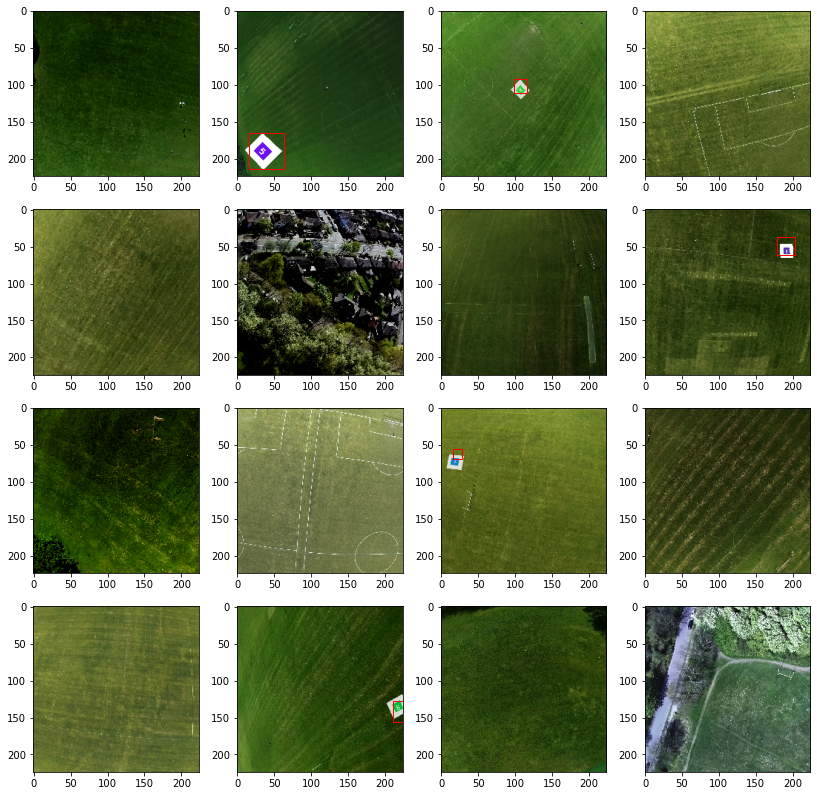

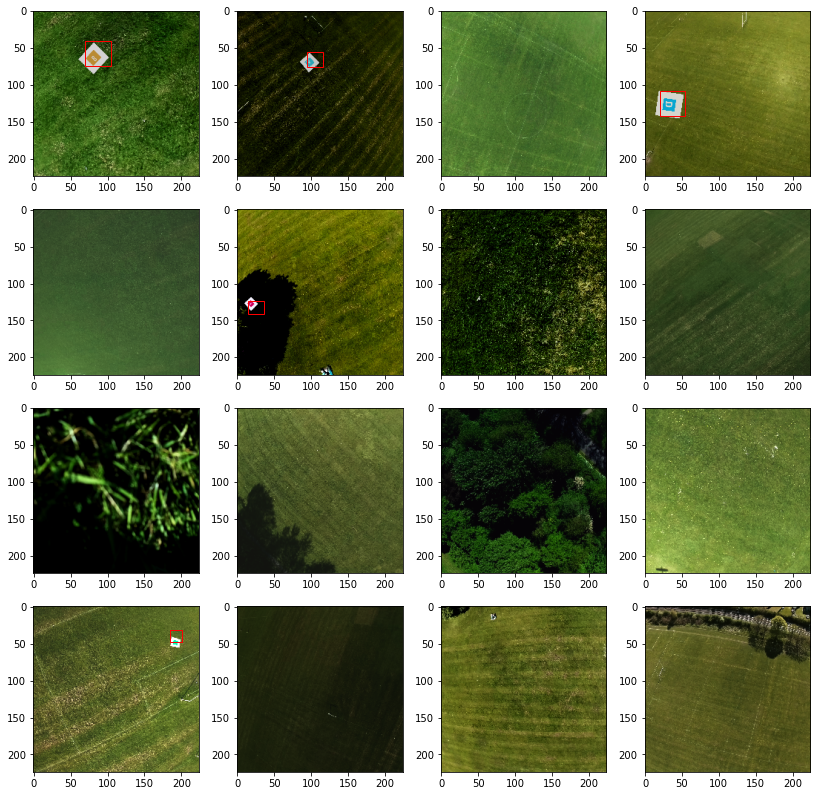

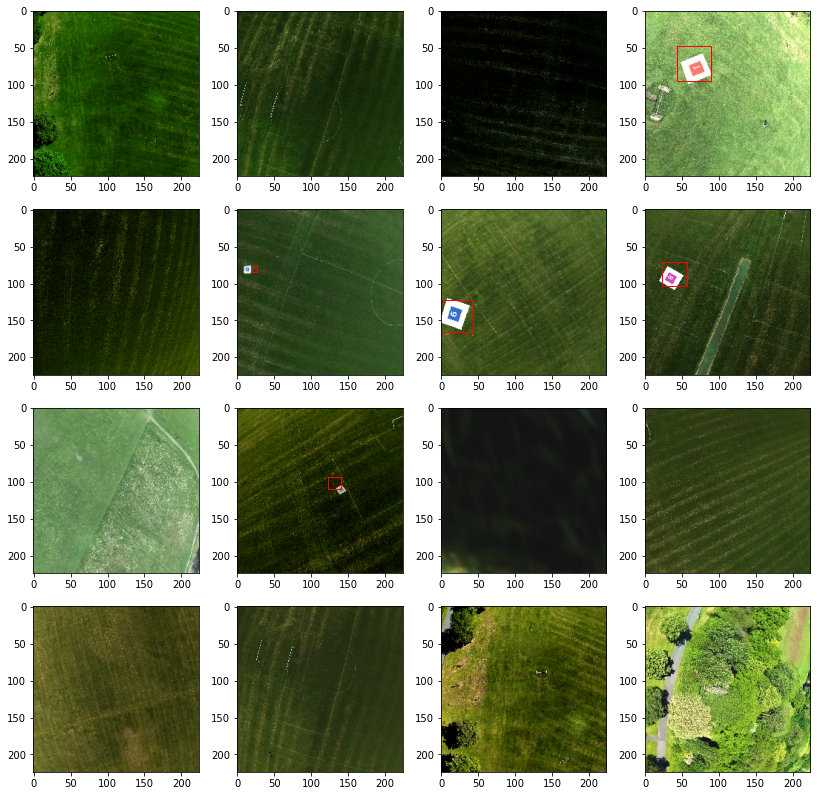

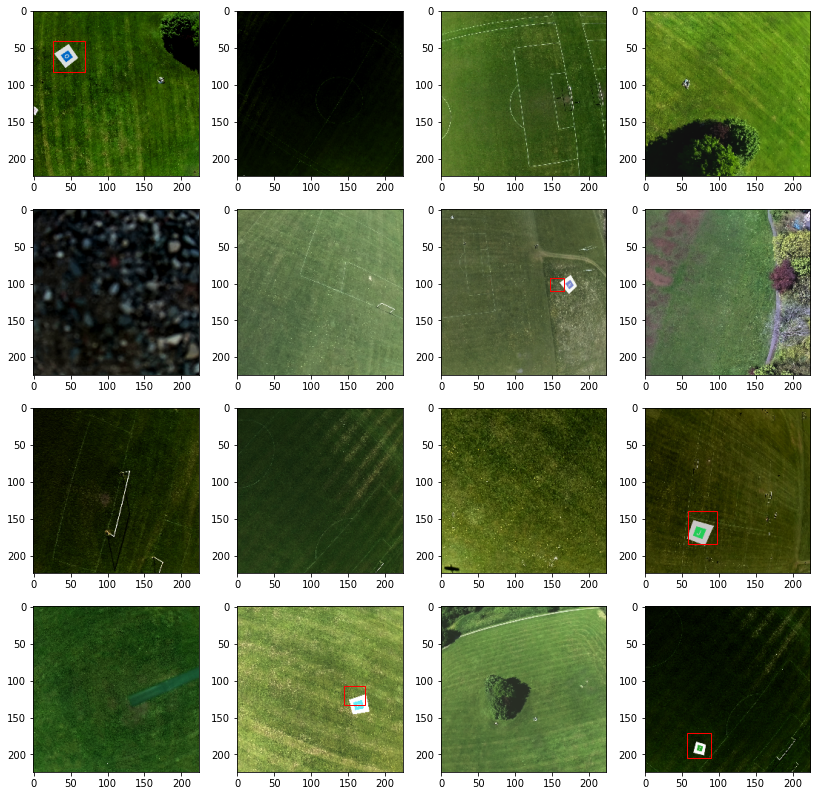

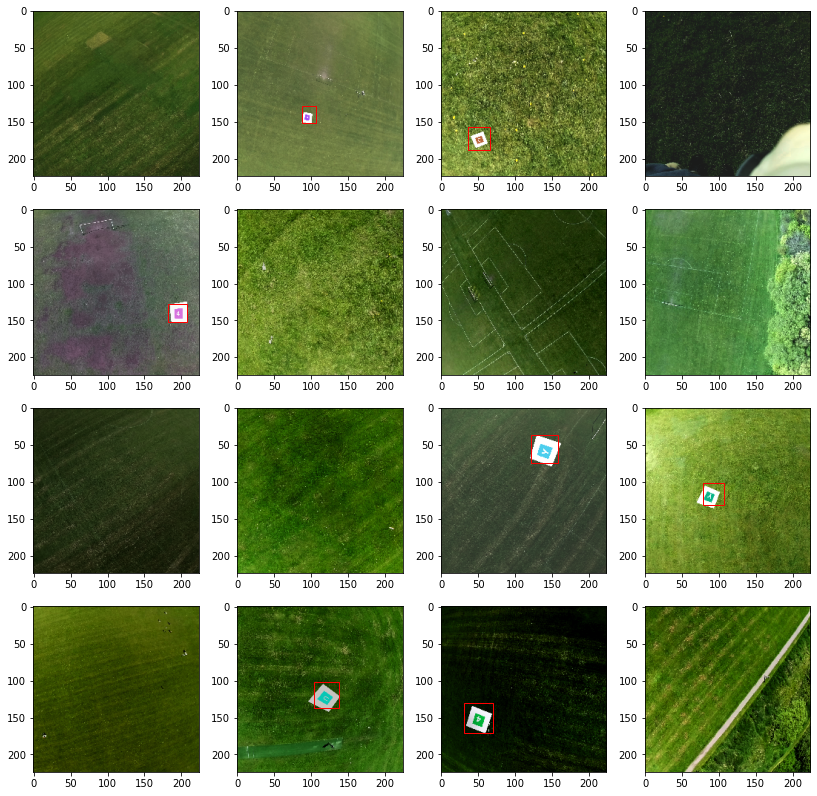

In [6]:
for X,Y in tf_data.take(5):
    res = model.predict(X)
    fig, axes  = plt.subplots(4,4, figsize = (14,14))
    for i, ax in enumerate(axes.flat):
        # Display the image
        ax.imshow(X[i].numpy().reshape(224,224,3)/255)

        X0 = res[1][i][0] - res[1][i][2]/2
        Y0 = res[1][i][1] - res[1][i][3]/2
        # Create a Rectangle patch
        if res[0][i] > 0.5:
            rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)

In [63]:
model_2 = k.models.load_model("weights/step2_propermobilenet_longertrain_zoomedimages_newstep1_no_color.tf")

In [51]:
img_f = "../tests_chenfu/vlcsnap-2021-06-25-14h58m34s073.png"

In [52]:
data = np.array(Image.open(img_f).resize((224,224), Image.NEAREST)).reshape((1,224,224,3))

In [53]:
res = model.predict(data)

In [54]:
res

[array([[0.26392993]], dtype=float32),
 array([[0.38445172, 0.23891523, 0.0648991 , 0.02960165]], dtype=float32)]

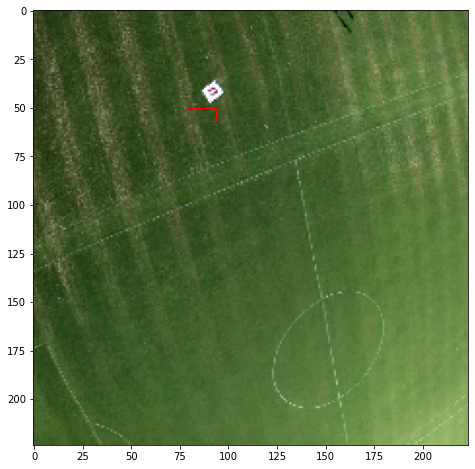

In [55]:
fig, ax  = plt.subplots(1,1, figsize = (8,8))
ax.imshow(data.reshape(224,224,3))
i = 0
X0 = res[1][i][0] - res[1][i][2]/2
Y0 = res[1][i][1] - res[1][i][3]/2
rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

In [47]:
def sanitize(coords):
    A = np.clip(coords[0],0.01,0.99)
    B = np.clip(coords[1],0.01,0.99)
    C = np.clip(coords[2],0.15,0.7)
    D = np.clip(coords[3],0.15,0.7)
    X0 = max(A - D/1.3, 0)
    Y0 = max(B - C/1.3, 0)
    X1 = min(A + D/1.3, 1)
    Y1 = min(B + C/1.3, 1)
    return X0, X1, Y0, Y1


In [56]:
X0, X1, Y0, Y1 = sanitize(res[1][0])

In [57]:
img = tf.image.resize(np.expand_dims(np.array(Image.open(img_f))[int(Y0*1000):int(Y1*1000)+1, int(X0*1000):int(X1*1000)+1, :], 0),(224,224), method="nearest")

In [15]:
res_2 = model_2.predict(img)

NameError: name 'model_2' is not defined

In [16]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [ ]:
int_to_char[np.argmax(res_2[0])]

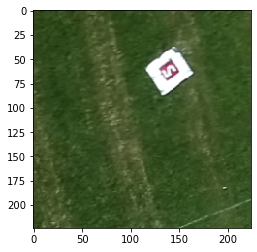

In [58]:
plt.imshow(img.numpy().reshape(224,224,3))

In [88]:
np.argmax(res[2][0])

31

In [89]:

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [90]:
int_to_char[np.argmax(res[2][0])]

'5'

In [105]:
res

[array([[0.03776151],
        [0.03832465],
        [0.03795189],
        [0.03829223],
        [0.03849894],
        [0.04017636],
        [0.04087996],
        [0.03897199],
        [0.0394516 ],
        [0.03769431],
        [0.03948095],
        [0.03879884],
        [0.03879979],
        [0.03799945],
        [0.03983122],
        [0.03887472],
        [0.0378592 ],
        [0.04019821],
        [0.03947484],
        [0.03861406],
        [0.03826395],
        [0.03802094],
        [0.03740403],
        [0.03803691],
        [0.03857973],
        [0.03830269],
        [0.03857255],
        [0.038582  ],
        [0.03862804],
        [0.0387859 ],
        [0.03766307],
        [0.03740543]], dtype=float32),
 array([[0.5987054 , 0.71438736, 0.21054262, 0.17842564],
        [0.59878206, 0.7146095 , 0.2106705 , 0.17826553],
        [0.598698  , 0.71490675, 0.21073651, 0.17853458],
        [0.59898436, 0.7157104 , 0.21067226, 0.17863373],
        [0.59934187, 0.71576226, 0.21066451, 0.

In [45]:
Y

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
       dtype=float32)>,
 <tf.Tensor: shape=(32, 4), dtype=float32, numpy=
 array([[0.54305214, 0.39611456, 0.1423589 , 0.15163006],
        [1.010404  , 0.12204555, 0.13340922, 0.14034222],
        [0.3619167 , 0.24476467, 0.11989287, 0.11599211],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [0.74961734, 0.9900609 , 0.10359631, 0.09251148],
        [       nan,        nan,        nan,        nan],
        [0.8407317 , 0.36445338, 0.20393804, 0.19815691],
        [0.37899357, 0.69693315, 0.0882605 , 0.08664178],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,     

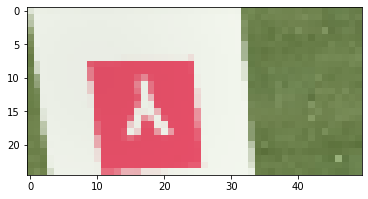

In [69]:
plt.imshow(X[2][75:100,0:50]/255)

In [73]:
res[1][2]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.04299361, 0.37054917, 0.11333504, 0.11964471], dtype=float32)>

In [80]:
np.array(sanitize(res[1][2]))*224

array([ 0.        , 24.51968688, 68.89909808, 97.10693105])

In [75]:
def sanitize(coords):
    A = np.clip(coords[0],0.01,0.99)
    B = np.clip(coords[1],0.01,0.99)
    C = np.clip(coords[2],0.1,0.7)
    D = np.clip(coords[3],0.1,0.7)
    X0 = max(A - D/1.8, 0)
    Y0 = max(B - C/1.8, 0)
    X1 = min(A + D/1.8, 1)
    Y1 = min(B + C/1.8, 1)
    return X0, X1, Y0, Y1